# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 599


---

In [3]:
# Print a few city names to inspect their format
print(cities[:10])

['winnemucca', 'port-aux-francais', 'puerto natales', 'fort bragg', 'punta arenas', 'constantia', 'puerto ayora', 'edinburgh of the seven seas', 'chibougamau', 'margaret river']


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | winnemucca
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | fort bragg
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | chibougamau
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | new holland
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | mwinilunga
Processing Record 16 of Set 1 | afaahiti
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | nortelandia
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | quellon
Processing Record 21 of Set 1 | fort mcmurray
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,winnemucca,40.9730,-117.7357,-6.97,86,0,2.57,US,1736348261
1,port-aux-francais,-49.3500,70.2167,5.85,73,28,9.21,TF,1736348262
2,puerto natales,-51.7236,-72.4875,11.25,82,75,7.20,CL,1736348263
3,fort bragg,35.1390,-79.0060,-1.72,65,0,3.09,US,1736348265
4,punta arenas,-53.1500,-70.9167,12.06,76,75,4.63,CL,1736348266


In [7]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,winnemucca,40.9730,-117.7357,-6.97,86,0,2.57,US,2025-01-08
1,port-aux-francais,-49.3500,70.2167,5.85,73,28,9.21,TF,2025-01-08
2,puerto natales,-51.7236,-72.4875,11.25,82,75,7.20,CL,2025-01-08
3,fort bragg,35.1390,-79.0060,-1.72,65,0,3.09,US,2025-01-08
4,punta arenas,-53.1500,-70.9167,12.06,76,75,4.63,CL,2025-01-08


In [9]:
import os

# Specify the directory path
directory_path = 'output_data'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,winnemucca,40.9730,-117.7357,-6.97,86,0,2.57,US,2025-01-08
1,port-aux-francais,-49.3500,70.2167,5.85,73,28,9.21,TF,2025-01-08
2,puerto natales,-51.7236,-72.4875,11.25,82,75,7.20,CL,2025-01-08
3,fort bragg,35.1390,-79.0060,-1.72,65,0,3.09,US,2025-01-08
4,punta arenas,-53.1500,-70.9167,12.06,76,75,4.63,CL,2025-01-08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

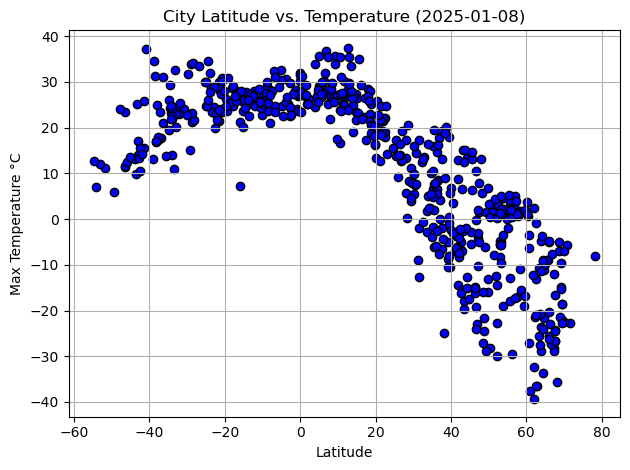

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

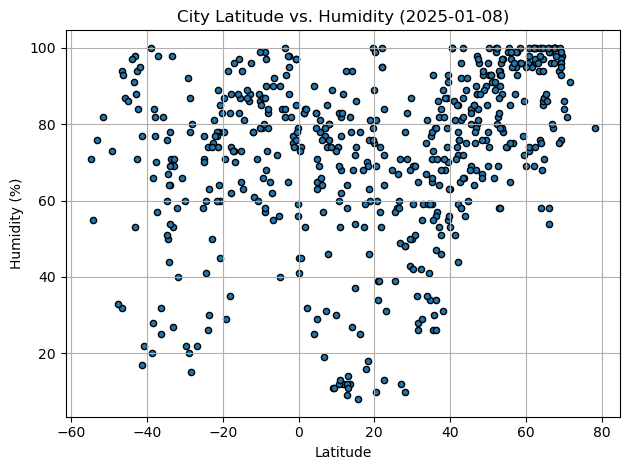

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

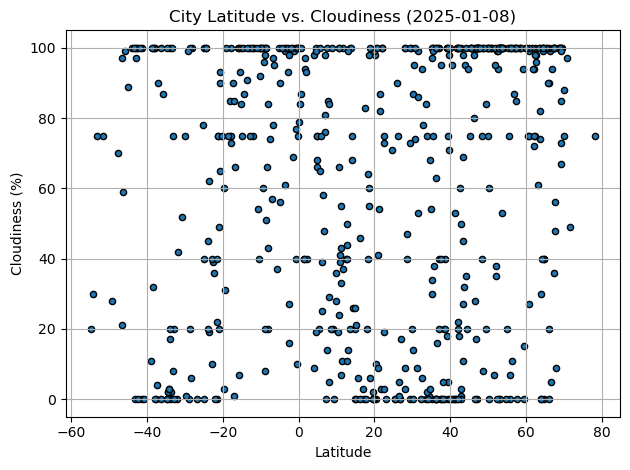

In [15]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

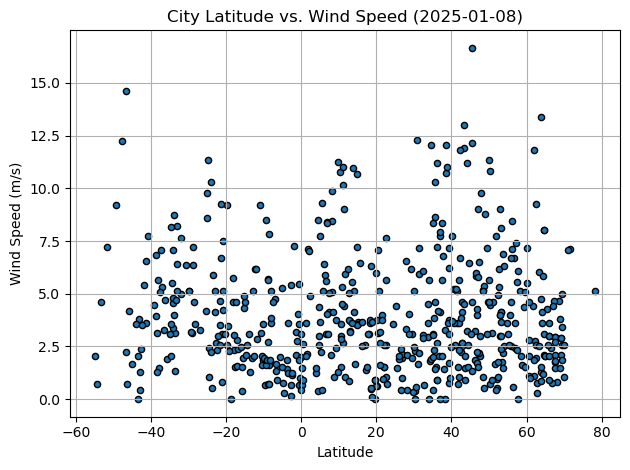

In [16]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,winnemucca,40.9730,-117.7357,-6.97,86,0,2.57,US,2025-01-08
3,fort bragg,35.1390,-79.0060,-1.72,65,0,3.09,US,2025-01-08
5,constantia,44.1833,28.6500,13.38,75,35,3.25,RO,2025-01-08
8,chibougamau,49.9168,-74.3659,-13.21,78,100,5.66,CA,2025-01-08
10,tiksi,71.6872,128.8694,-22.64,91,49,7.13,RU,2025-01-08


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude <= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.85,73,28,9.21,TF,2025-01-08
2,puerto natales,-51.7236,-72.4875,11.25,82,75,7.20,CL,2025-01-08
4,punta arenas,-53.1500,-70.9167,12.06,76,75,4.63,CL,2025-01-08
6,puerto ayora,-0.7393,-90.3518,24.19,97,100,4.02,EC,2025-01-08
7,edinburgh of the seven seas,-37.0676,-12.3116,17.72,98,90,5.34,SH,2025-01-08


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.77x + 33.73
The r-value is: -0.858778019155916


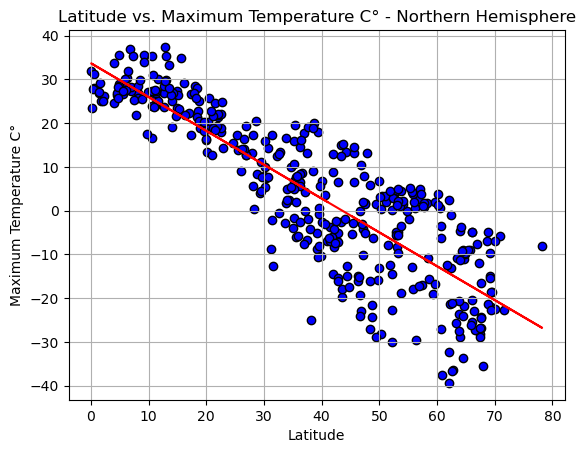

In [19]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.22x + 29.13
The r-value is: 0.5425583440586684


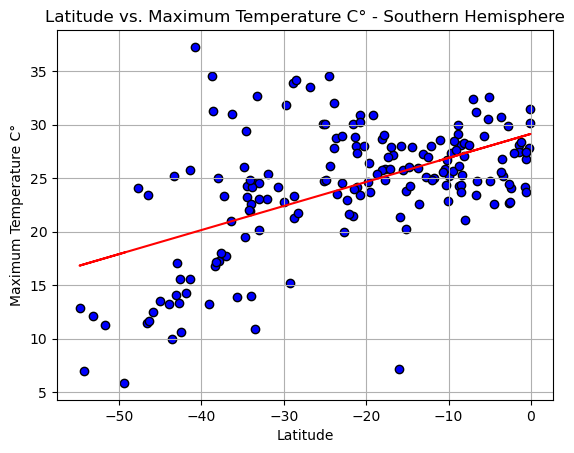

In [20]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** There is a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, it is a negative correlation, while in the Southern Hemisphere, it is a positive correlation. Maximum Temperature increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.58x + 50.29
The r-value is: 0.514737533770326


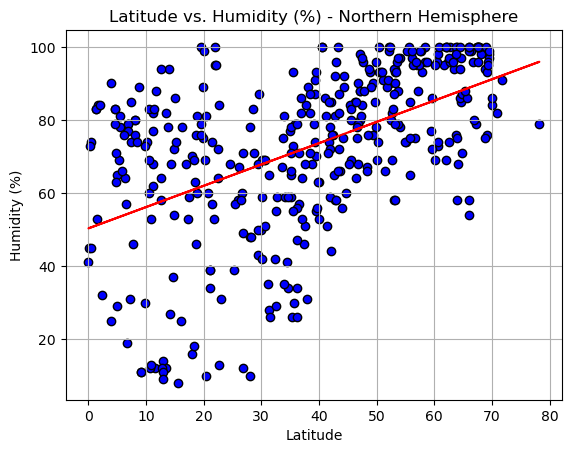

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.37x + 79.6
The r-value is: 0.2568484584272254


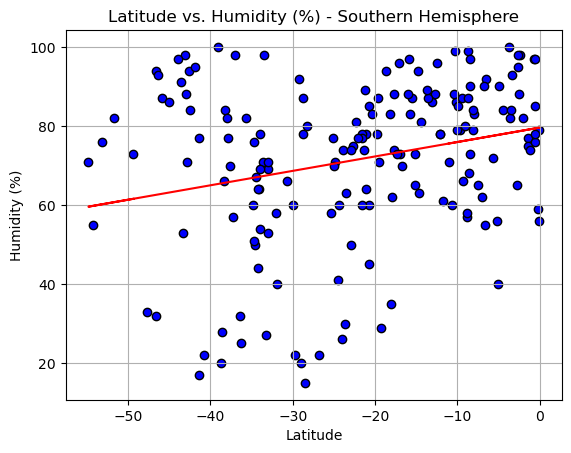

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** There is little to no relationship between latitude and humidity based on the data available. The linear equation for each hemisphere shows a very slightly positive correlation, which implies that proximity to the equator has no bearing on humdity. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.47x + 41.72
The r-value is: 0.2381877749316658


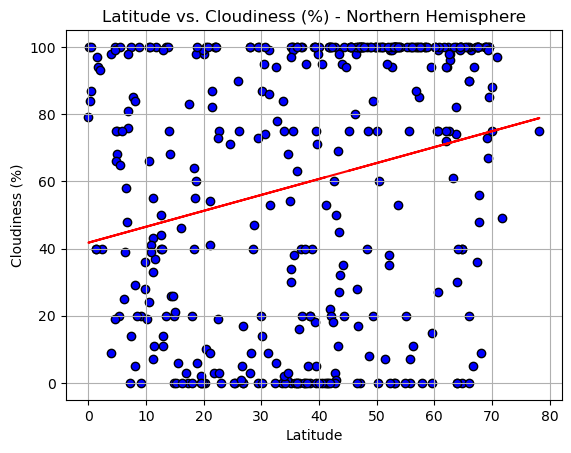

In [23]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.76x + 79.18
The r-value is: 0.28683860624551655


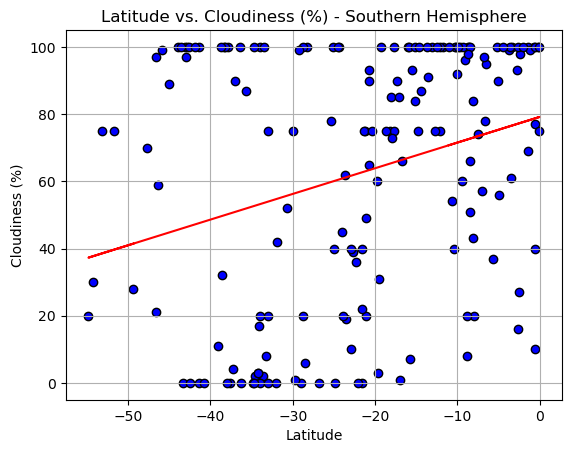

In [24]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** There is little to no relationship between latitude and cloudiness based on the data available. The linear equation for each hemisphere shows a positive correlation, which implies that proximity to the equator has no bearing on cloudiness. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = -0.0x + 4.16
The r-value is: -0.031844869587633495


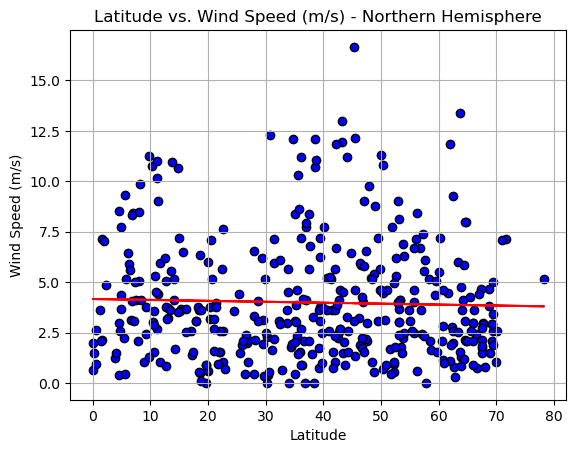

In [25]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.05x + 2.74
The r-value is: -0.27669182321524816


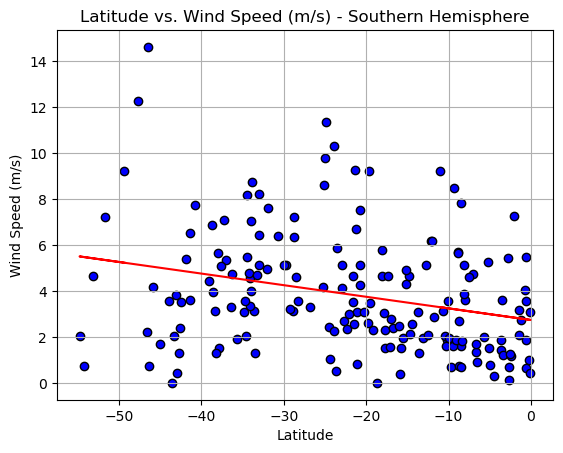

In [26]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** There is little to no relationship between latitude and wind speed based on the data available. The r-value is low for both hemispheres and the scatter points show that the data is too spread for there to be any reliable correlation between latitude and wind speed.